In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def wrangle(filepath):
  df = pd.read_csv(filepath)

  # drop unnecessary columns : instant , dteday
  df.drop(columns = ["instant","dteday"], inplace = True)

  # drop columns causing high multicollinearity
  df.drop(columns = ["atemp"], inplace = True)

  # drop columns causing data leakage
  df.drop(columns = ["casual","registered"], inplace = True)


  return df

In [26]:
df = wrangle("/content/day (1).csv")

In [4]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


no null values

## Bike Sharing Dataset – Column Descriptions

| Column         | Description |
|----------------|-------------|
| **season**     | Season (categorical):<br>1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter |
| **yr**         | Year (binary):<br>0 = 2018, 1 = 2019 |
| **mnth**       | Month (1 to 12):<br>1 = January, ..., 12 = December |
| **holiday**    | Whether the day is a holiday:<br>0 = No, 1 = Yes |
| **weekday**    | Day of the week (0 to 6):<br>0 = Sunday, ..., 6 = Saturday |
| **workingday** | Whether the day is neither a weekend nor holiday:<br>0 = No, 1 = Yes |
| **weathersit** | Weather situation:<br>1 = Clear, Few clouds<br>2 = Mist + Cloudy<br>3 = Light Snow/Rain + Thunder<br>4 = Heavy Rain, Snow (rare) |
| **temp**       | **actual temperature** in Celsius (e.g., `temp × 41 = actual temp`) |
| **atemp**      | **“feels-like” temperature** (apparent temperature) |
| **hum**        | **humidity**  |
| **windspeed**  | **wind speed**  |
| **casual**     | Number of **non-registered (casual)** users who rented bikes |
| **registered** | Number of **registered users** who rented bikes |
| **cnt**        | **Total count of bikes rented** (`cnt = casual + registered`) — this is your **target variable** |


In [37]:
cat_cols = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
num_cols = ["temp","hum","windspeed","cnt"]

The following columns will need One-Hot Encoding:

1. season
2. mnth
3. weekday
4. weathersit

#EDA

In [36]:
df[num_cols].describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


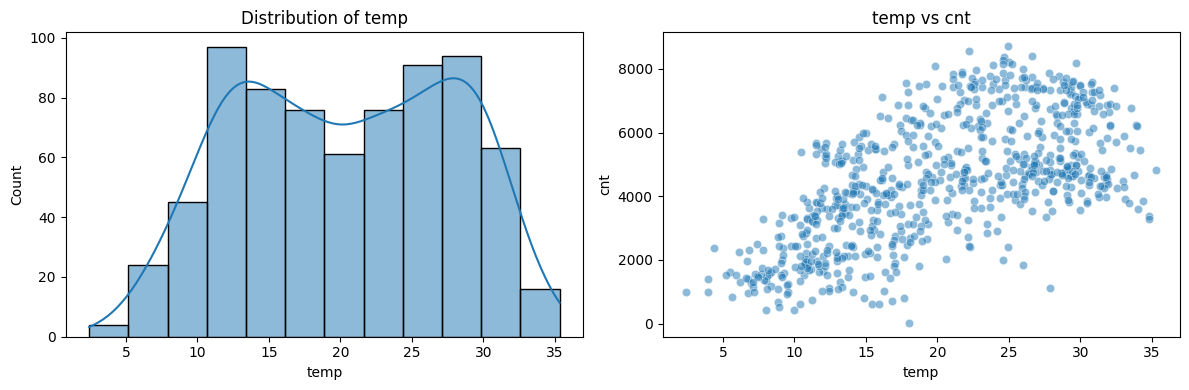

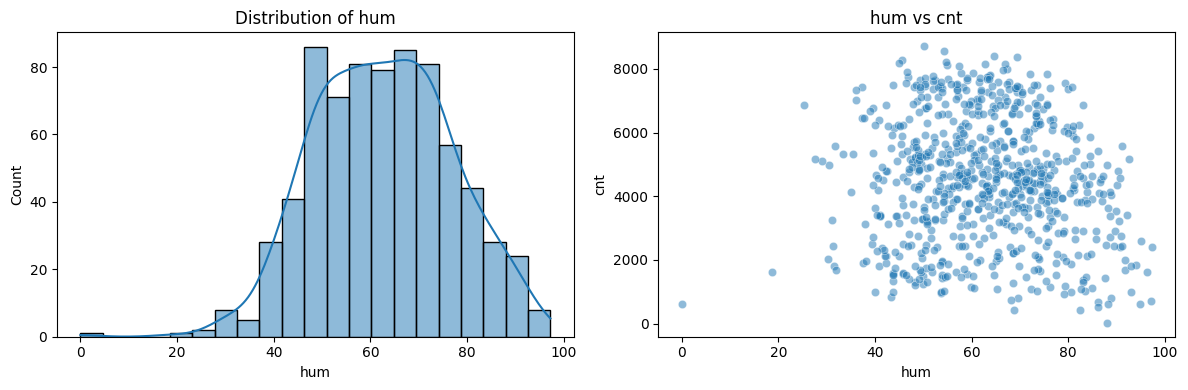

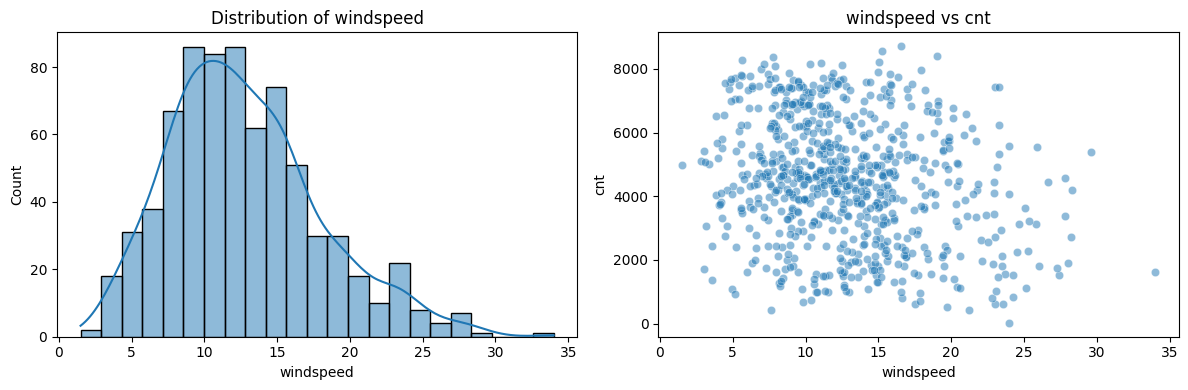

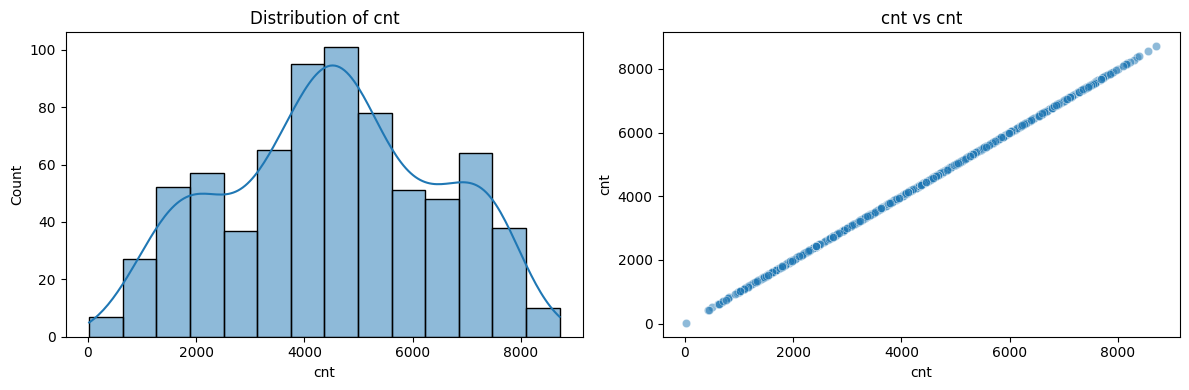

In [49]:
for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Distribution plot
    sns.histplot(df[col], kde=True, ax=ax[0])
    ax[0].set_title(f'Distribution of {col}')

    # Scatter plot vs cnt
    sns.scatterplot(x=df[col], y=df['cnt'], alpha=0.5, ax=ax[1])
    ax[1].set_title(f'{col} vs cnt')

    plt.tight_layout()
    plt.show()

<Axes: >

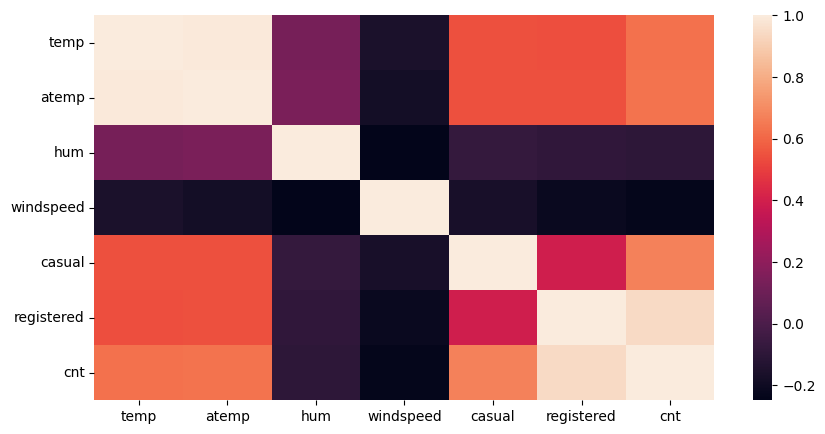

In [21]:
plt.figure(figsize = (10,5))
sns.heatmap(df[num_cols].corr())

The heatmap and scatterplots clearly shows the following:

1. temp and atemp are multicollinear, one needs to be dropped

2. temp shows strong positive correlation, its an important predictor

3. windspeed and humidity show slight negative correlation

4. cnt = casual + registered. we need to drop these columns to prevent data leakage





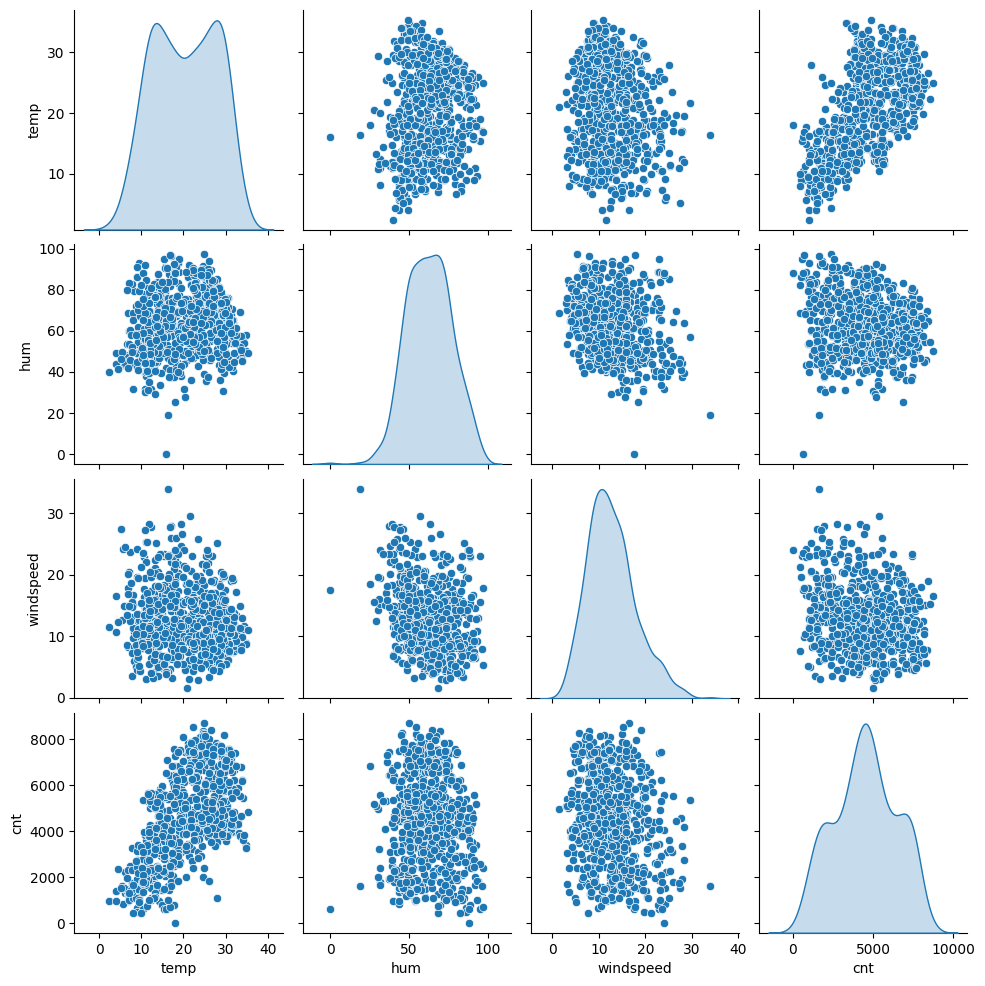

In [48]:
sns.pairplot(df[num_cols], diag_kind='kde')
plt.show()

There is no multicollinearity b/w any of our final numerical predictors.

<Axes: >

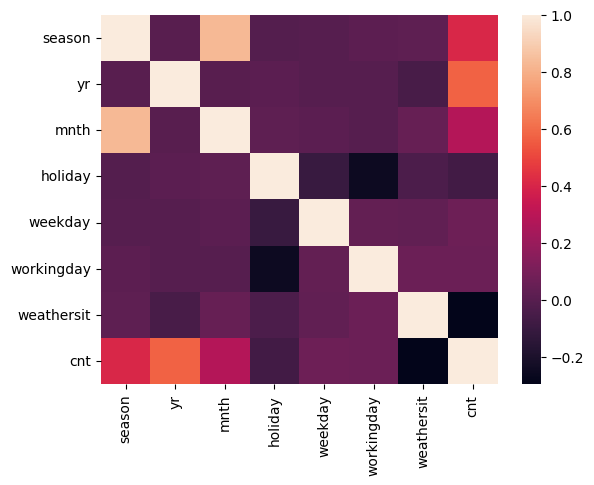

In [23]:
sns.heatmap(df[cat_cols].corr())

<Axes: >

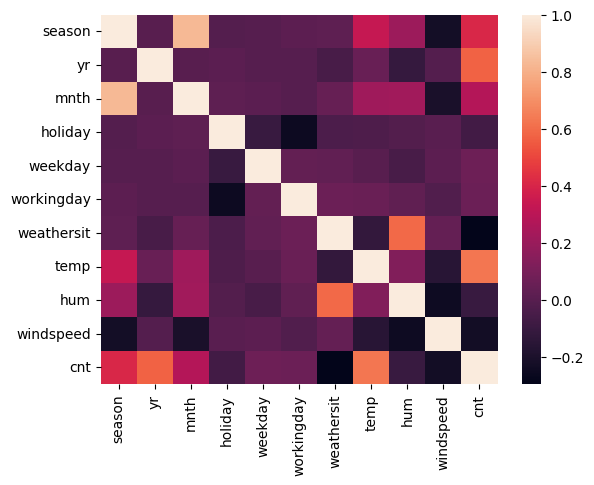

In [27]:
sns.heatmap(df.corr())

There is multicollinearity b/w
1. month and season
2. year and season

We'll drop them later to see whther it impacts the performance.


/tmp/ipython-input-31-2154727874.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cnt"])


<Axes: xlabel='cnt', ylabel='Density'>

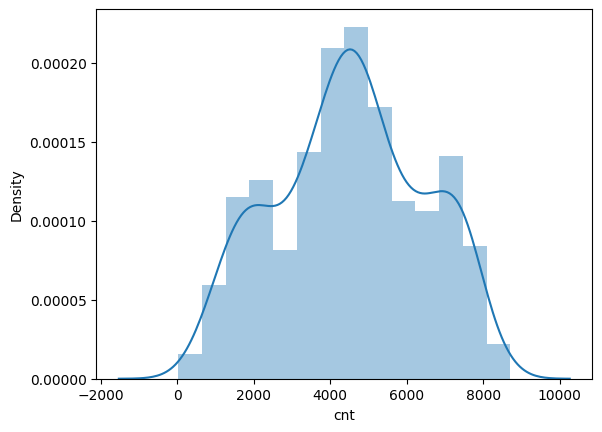

In [31]:
sns.distplot(df["cnt"])

target column is pretty much like a mormal bell curve but has 3 peaks. might mean something

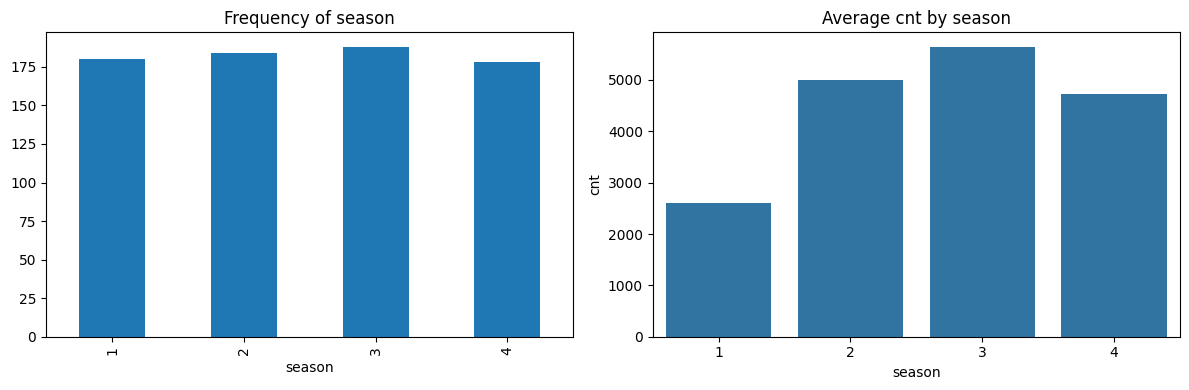

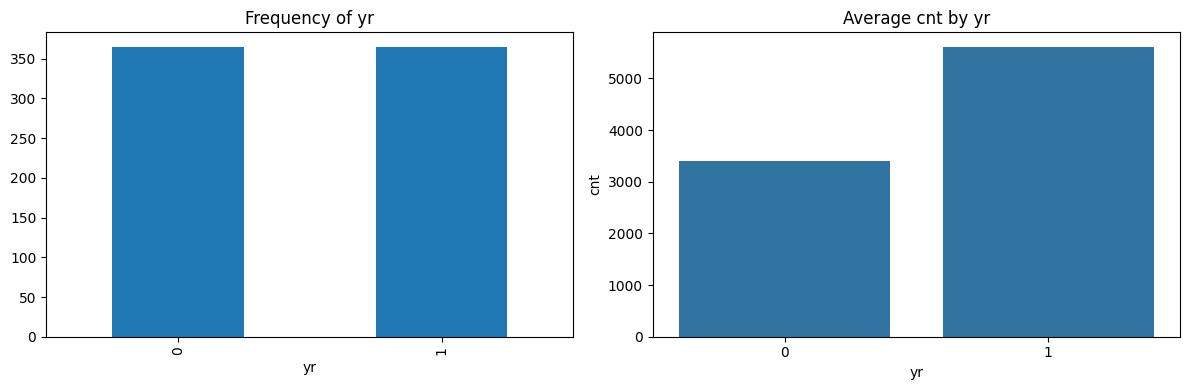

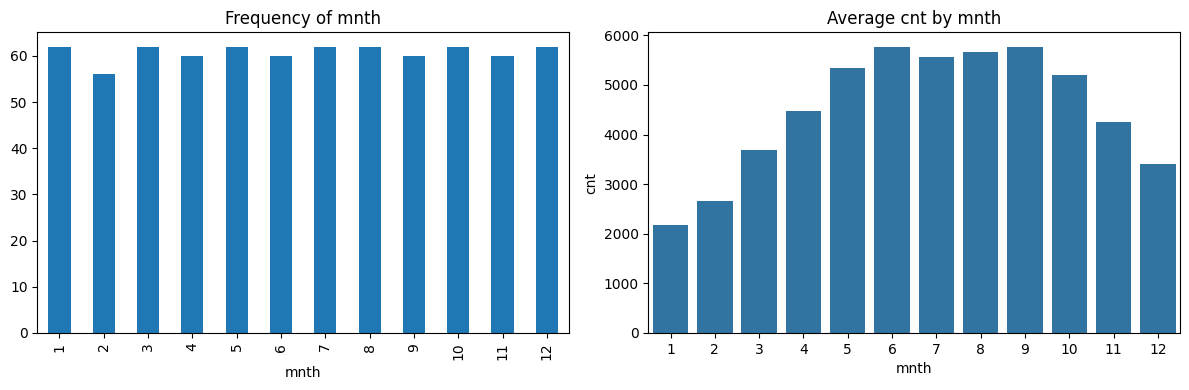

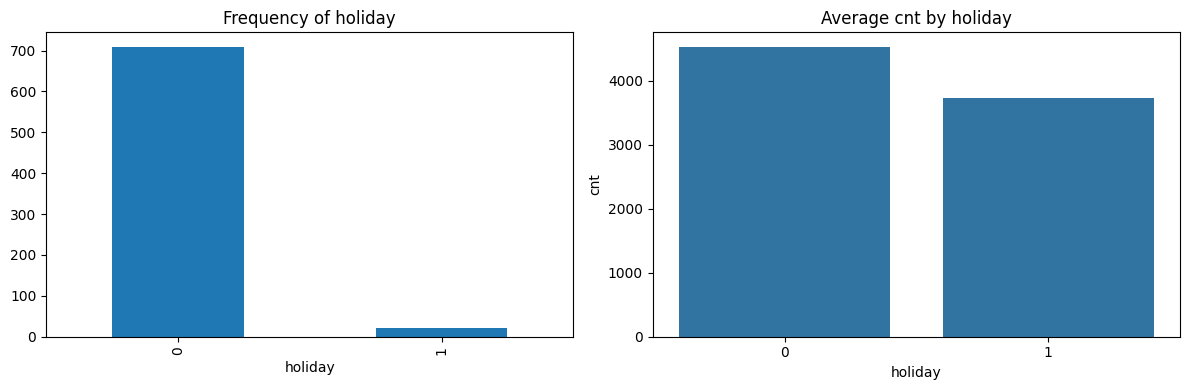

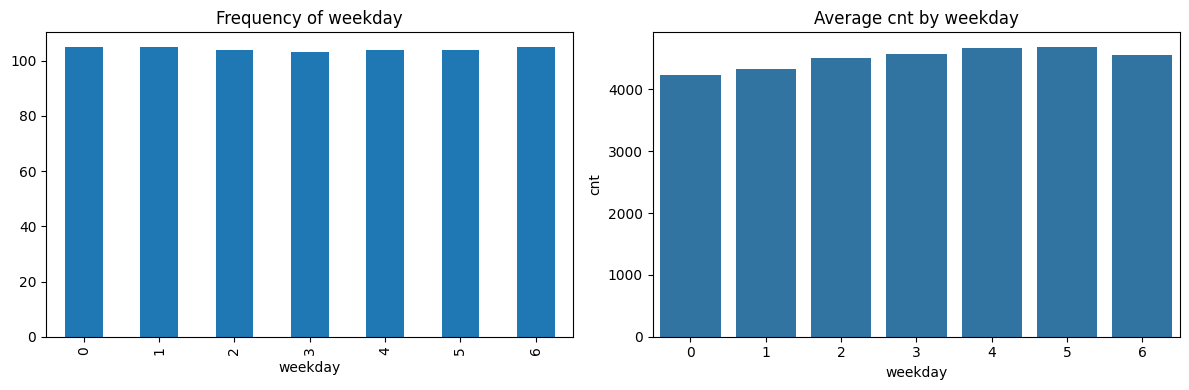

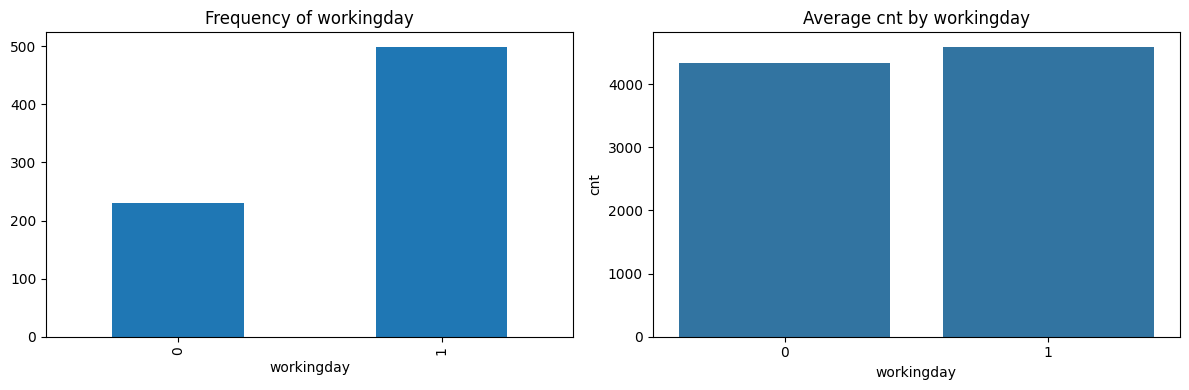

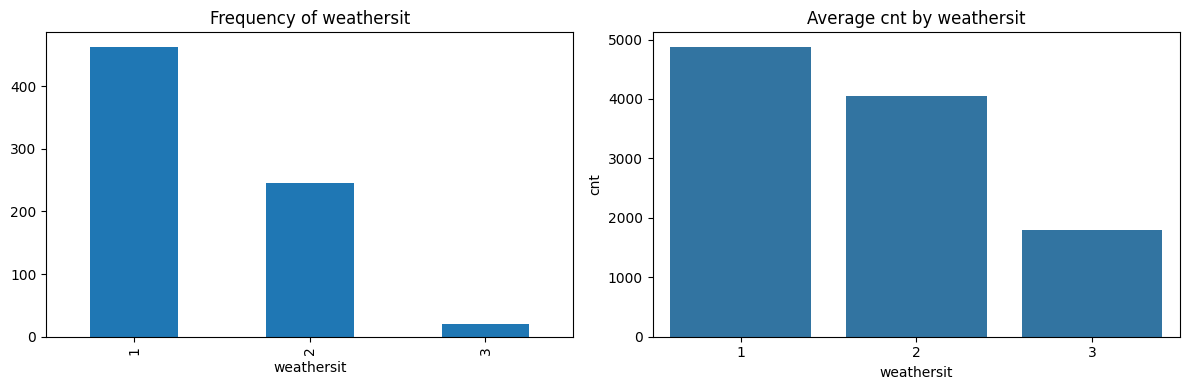

In [44]:
for col in cat_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12,4))

    # Value counts (how often each category occurs)
    df[col].value_counts().sort_index().plot(kind='bar', ax=ax[0])
    ax[0].set_title(f"Frequency of {col}")
    ax[0].set_xlabel(col)

    # Average count by category
    sns.barplot(x=col, y='cnt', data=df, ax=ax[1], estimator=np.mean, errorbar=None, order=sorted(df[col].unique()))
    ax[1].set_title(f"Average cnt by {col}")
    ax[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


weekday and workingday don't affect cnt that much, may not be strong predictors.

# Model Building

In [110]:
# Splitting the target from the predictors

X = df.drop(columns = ["cnt"])
y = df["cnt"]

In [51]:
df.shape

(730, 11)

In [111]:
# train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.15, random_state = 42)

In [58]:
X_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
467,2,1,4,0,5,1,1,18.142500,40.8333,10.416557
571,3,1,7,0,4,1,1,31.843347,59.6667,19.082471
55,1,0,2,0,5,1,2,14.938268,71.2174,23.218113
594,3,1,8,0,6,0,1,27.811653,60.3333,11.917089
487,2,1,5,0,4,1,2,22.960000,76.8333,8.957632


In [57]:
#IMPORTS

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor


The following columns need One-Hot Encoding:

1. season
2. mnth
3. weekday
4. weathersit

In [61]:
# Linear Regression

step1 = ColumnTransformer(
    transformers=[
        ("col_tnf", OneHotEncoder(sparse_output = False, drop='first'), [0, 2, 4, 6]) # list of transformations, each element of the list is a 3D set
    ],
    remainder='passthrough'
)

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8459993124927077
MAE 529.7325037947174


In [167]:
# Ridge Regression

step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,2,4,6]),
    ('num', StandardScaler(), [7,8,9])

], remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8552058482764563
MAE 529.6976607087648


In [119]:
#Lasso Regression

step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,2,4,6]),
    ('num', StandardScaler(), [7,8,9])

], remainder='passthrough')

step2 = Lasso(alpha=0.1, max_iter=10000)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8459481167620755
MAE 530.3433456238248


In [120]:
# KNN

step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,2,4,6]),
    ('num', StandardScaler(), [7,8,9])

], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=12)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7701897523527366
MAE 701.7333333333335


In [121]:
# Decision Tree

step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,2,4,6]),
    ('num', StandardScaler(), [7,8,9])

], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7827901404461145
MAE 559.688569986555


In [122]:
# SVR

step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,2,4,6]),
    ('num', StandardScaler(), [7,8,9])

], remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8801918235770343
MAE 410.17703096347026


In [163]:
# Random Forest

step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,2,4,6]),
    ('num', StandardScaler(), [7,8,9])

], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.905637785747052
MAE 408.53938507158705


In [123]:
# Adaboost

step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,2,4,6]),
    ('num', StandardScaler(), [7,8,9])

], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7891777476172934
MAE 657.5603769862829


In [124]:
# Gradient Boosting

step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,2,4,6]),
    ('num', StandardScaler(), [7,8,9])

], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8872611425234692
MAE 422.3531145890696


In [125]:
# XGBoost

step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,2,4,6]),
    ('num', StandardScaler(), [7,8,9])

], remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8532963395118713
MAE 502.6562194824219


In [129]:
# Voting
step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,2,4,6]),
    ('num', StandardScaler(), [7,8,9])

], remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = Ridge(alpha=10)
step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9090410255615524
MAE 407.59076317112385


In [127]:
# Stacking

step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,2,4,6]),
    ('num', StandardScaler(), [7,8,9])

], remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8968486482761804
MAE 421.84006376599115


Results:

1. Voting
2. Random Forest
3. Stacking
4. Gradient Boosting

# Steps to improve performance

## 1. Hyperparameter Tuning using GridSearchCV on the best performing models (Worked)

In [100]:
# Step 1: Column Transformer (OHE for categorical features)
step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,2,4,6]),
    ('num', StandardScaler(), [7,8,9])

], remainder='passthrough')

# Step 2: Individual Regressors
rf = RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)
et = Ridge(alpha=10)

# Step 3: Voting Regressor
voter = VotingRegressor([
    ('rf', rf),
    ('gbdt', gbdt),
    ('xgb', xgb),
    ('et', et)
])

# Step 4: Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', voter)
])

# Step 5: Param Grid for GridSearchCV (favoring Gradient Boosting)
param_grid = {
    # Random Forest
    'step2__rf__n_estimators': [200, 350],
    'step2__rf__max_depth': [10, 15],

    # Gradient Boosting
    'step2__gbdt__learning_rate': [0.1, 0.3],
    'step2__gbdt__n_estimators': [100],

    # XGBoost
    'step2__xgb__max_depth': [3, 5],
    'step2__xgb__learning_rate': [0.1, 0.3],

    # Ridge
    'step2__et__alpha': [1.0, 10.0],

    # Voting Weights (favoring gbdt)
    'step2__weights': [
        [3, 2, 1, 1],
        [5, 1, 1, 1],
        [5, 2, 1, 1]
    ]
}

# Step 6: GridSearchCV
grid = GridSearchCV(pipe, param_grid,
                    scoring='r2',
                    cv=5,
                    verbose=1,
                    n_jobs=-1)

# Fit the model
grid.fit(X_train, y_train)

# Predict and Evaluate
y_pred = grid.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'step2__et__alpha': 1.0, 'step2__gbdt__learning_rate': 0.3, 'step2__gbdt__n_estimators': 100, 'step2__rf__max_depth': 15, 'step2__rf__n_estimators': 200, 'step2__weights': [3, 2, 1, 1], 'step2__xgb__learning_rate': 0.3, 'step2__xgb__max_depth': 5}
R2 Score: 0.9099953132939824
MAE: 404.27620000528344


## 2. Dropping those columns that had high multicollinearity (failed)



In [108]:
# Splitting the target from the predictors

X = df.drop(columns = ["cnt","mnth","yr"])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.15, random_state = 42)

# Voting
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,2,4])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=200,random_state=3,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,learning_rate=0.3)
xgb = XGBRegressor(learning_rate=0.3,max_depth=5)
et = Ridge(alpha=1)
step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[3,2,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))



R2 score 0.5158362421185836
MAE 1077.87034586056


# fitting the model with the best parameters

In [157]:
from sklearn.preprocessing import StandardScaler

# Step 1: Column Transformer with scaling for numerical and OHE for categorical
step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,2,4,6]),
    ('num', StandardScaler(), [7,8,9])

], remainder='passthrough')

# (Best Parameters: {'step2__et__alpha': 1.0,
#'step2__gbdt__learning_rate': 0.3, 'step2__gbdt__n_estimators': 100,
#'step2__rf__max_depth': 15, 'step2__rf__n_estimators': 200,
#'step2__weights': [3, 2, 1, 1],
#'step2__xgb__learning_rate': 0.3, 'step2__xgb__max_depth': 5}


rf = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=200,max_features=0.5,random_state=3)
xgb = XGBRegressor(n_estimators=30,learning_rate=0.3,max_depth=5,random_state=3)
et = Ridge(alpha=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('Test R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Test R2 score 0.9101785376658404
MAE 406.8563302556456


In [155]:
# Adjusted R2

r2=0.9101785376658404

# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2


0.901105662682592

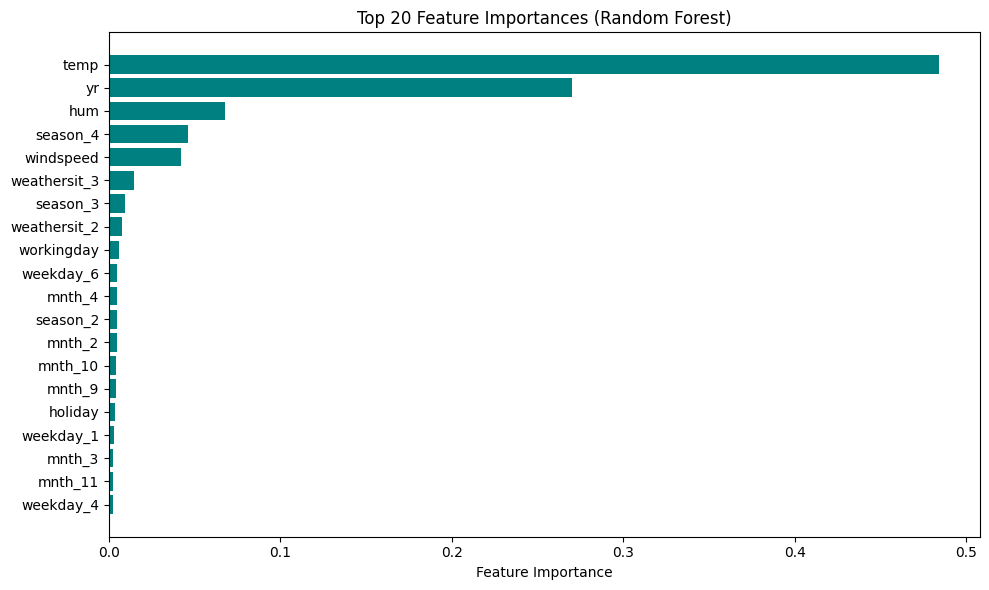

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Manual setup of known inputs
num_features = ["temp", "hum", "windspeed"]
cat_indices = [0, 2, 4, 6]

# 2. Get transformed feature names
ohe = pipe.named_steps['step1'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out()  # Fixed here

# 3. Combine with the rest
passthrough_features = [col for i, col in enumerate(X_train.columns) if i not in cat_indices + [7, 8, 9]]
scaled_features = num_features + passthrough_features
feature_names = np.concatenate([ohe_feature_names, scaled_features])

# 4. Get feature importances
rf_model = pipe.named_steps['step2']
importances = rf_model.feature_importances_

# 5. Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6. Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:20][::-1],
         feat_imp_df['Importance'][:20][::-1],
         color='teal')

plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# Validating model Assumptions

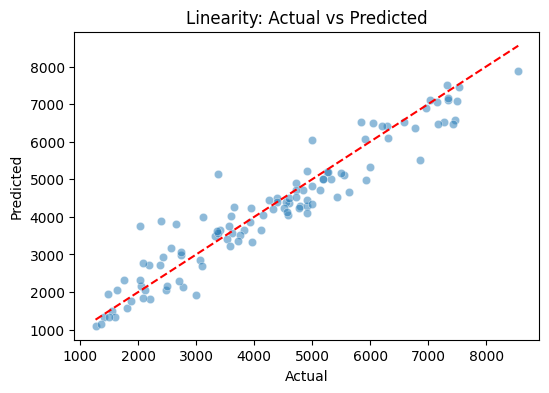

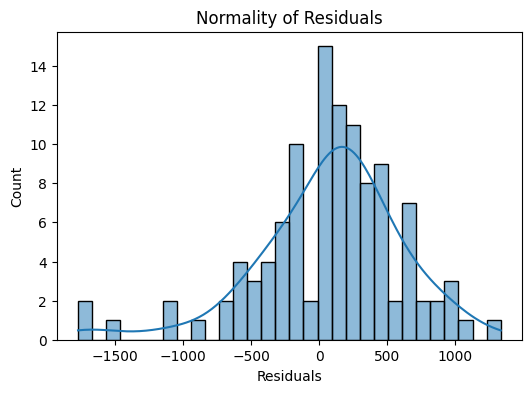

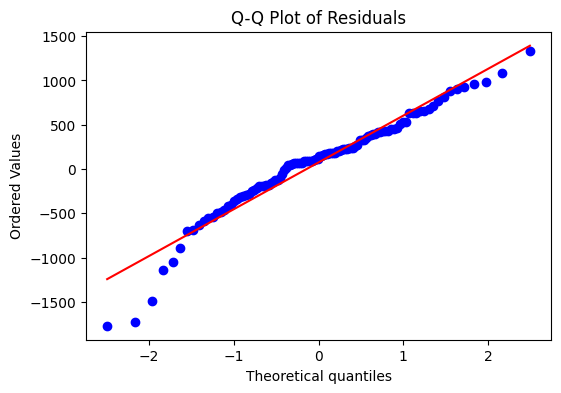

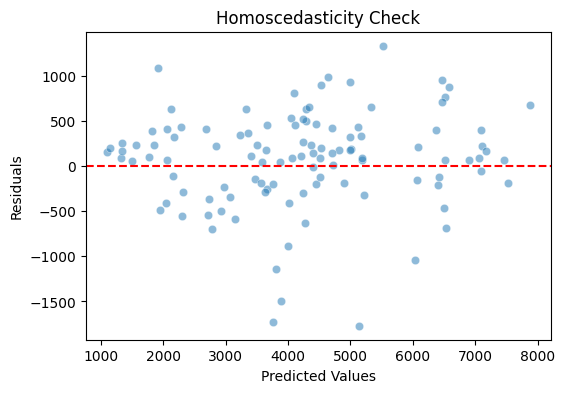

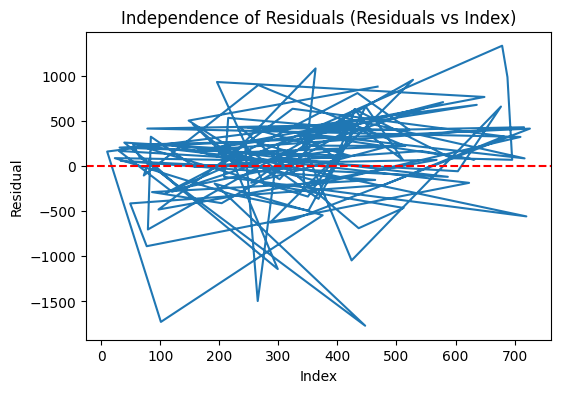

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Get predictions and residuals
y_pred = pipe.predict(X_test)
residuals = y_test - y_pred

# 2. Linearity Check: Actual vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linearity: Actual vs Predicted")
plt.show()

# 3. Normality of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Normality of Residuals")
plt.xlabel("Residuals")
plt.show()

# Optional: Q-Q Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 4. Homoscedasticity: Residuals vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()

# 5. Independence of residuals(no autocorrelation): Residuals vs Index
plt.figure(figsize=(6, 4))
plt.plot(residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Independence of Residuals (Residuals vs Index)")
plt.xlabel("Index")
plt.ylabel("Residual")
plt.show()
